### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV



In [2]:
auto_data = pd.read_csv("audi.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [4]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000,10668.000,10668.000,10668.000,10668.00,10668.000
mean,2017.101,22896.685,24827.244,126.011,50.77,1.931
std,2.167,11714.842,23505.257,67.170,12.95,0.603
min,1997.000,1490.000,1.000,0.000,18.90,0.000
25%,2016.000,15130.750,5968.750,125.000,40.90,1.500
50%,2017.000,20200.000,19000.000,145.000,49.60,2.000
75%,2019.000,27990.000,36464.500,145.000,58.90,2.000
max,2020.000,145000.000,323000.000,580.000,188.30,6.300


In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
for col in auto_data.columns:
    print(col, auto_data[col].unique())

model [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
year [2017 2016 2019 2015 2014 2018 2013 2020 2004 2009 2012 2010 2007 2011
 2008 2003 2005 2002 2006 1998 1997]
price [12500 16500 11000 ... 21291 12380  3750]
transmission ['Manual' 'Automatic' 'Semi-Auto']
mileage [15735 36203 29946 ...  4018  1978  8646]
fuelType ['Petrol' 'Diesel' 'Hybrid']
tax [150  20  30 145 125 200   0 205 160 235 260 325 300 165 240 565 265 135
 570 555 140 330 305 155 580 290 195 115 295 220 230 280 315 535 190 540
 515]
mpg [ 55.4  64.2  67.3  49.6  58.9  61.4  70.6  60.1  57.6  52.3  53.3  56.5
  47.1  47.9  62.8  76.3  51.4  65.7  68.9  50.4  72.4  38.7  74.3  42.8
  83.1  57.7  54.3  40.4  44.1  33.2  42.2  44.8  48.7  37.7  35.8  40.9
  45.6  34.   29.4  39.8  39.2  41.5  38.2  32.1  30.7  34.9  43.5  36.2
  30.1  32.8  29.7  26.4  33.6  34.5  46.3  37.2  80.7  28.8  31.7  32.5
  31.

In [11]:
auto_data['engineSize'].value_counts()

2.0    5169
1.4    1594
3.0    1149
1.6     913
1.5     744
1.0     558
4.0     154
1.8     126
2.5      61
0.0      57
2.9      49
1.2      31
4.2      25
5.2      23
3.2       5
1.9       4
2.7       3
4.1       2
6.3       1
Name: engineSize, dtype: int64

<AxesSubplot:>

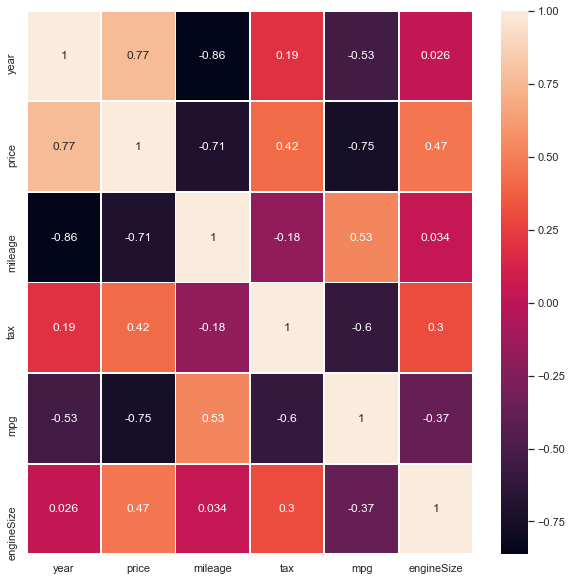

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [8]:
#data_dummy = pd.concat(auto_data, pd.get_dummies(auto_data['model']),
#                                  pd.get_dummies(auto_data['transmission']),
#                                  pd.get_dummies(auto_data['fuelType']), axis = 1)
#data_dummy.drop(['model', ' transmission', 'fuelType'])
data_dummy = pd.get_dummies(auto_data)
data_dummy

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,2020,16999,1978,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,2020,17199,609,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,2017,19499,8646,150,47.9,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [9]:
X, Y = data_dummy.drop(['price'], axis=1), data_dummy['price']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [11]:
X_train

,year,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
3923,2016,48891,0,74.3,2.0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2745,2020,582,145,33.2,3.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7184,2019,3346,145,51.4,1.6,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4910,2019,3979,145,51.4,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6793,2017,32523,145,56.5,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2018,7442,145,52.3,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7291,2015,57841,30,57.6,1.4,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1344,2019,5423,145,55.4,2.0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
7293,2017,36397,150,42.8,2.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [12]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled

array([[-0.509,  1.02 , -1.881, ...,  0.968, -0.052, -0.963],
       [ 1.332, -1.026,  0.272, ...,  0.968, -0.052, -0.963],
       [ 0.872, -0.909,  0.272, ...,  0.968, -0.052, -0.963],
       ...,
       [ 0.872, -0.821,  0.272, ...,  0.968, -0.052, -0.963],
       [-0.049,  0.491,  0.347, ..., -1.033, -0.052,  1.039],
       [-0.509, -0.065, -1.584, ...,  0.968, -0.052, -0.963]])

In [13]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train);
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)
print (f'RMSE = {round(simple_LR_RMSE, 3)}')

RMSE = 1018292034157705.5


In [14]:
print (f'Test_std = {round(Y_test.std(),3)}');

Test_std = 11390.214


Text(0, 0.5, 'Target')

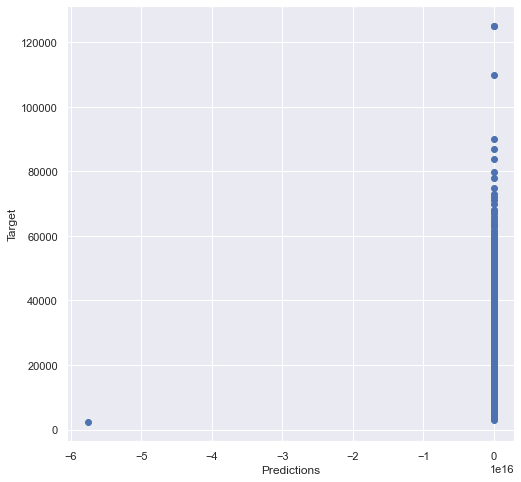

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [16]:
simple_LR.intercept_, simple_LR.coef_

pd.DataFrame(simple_LR.coef_, data_dummy.columns[1:], columns=['Coefficients'])

,Coefficients
price,4.004e+03
mileage,-1.880e+03
tax,-1.864e+03
mpg,-3.471e+03
engineSize,2.845e+03
model_ A1,1.957e+16
model_ A2,1.054e+15
model_ A3,2.250e+16
model_ A4,1.969e+16
model_ A5,1.602e+16


In [17]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions), 3)}')

pd.DataFrame(model.coef_, data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 13585717.217


c:\users\danil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384070215.9906769, tolerance: 104873071.56967637
  model = cd_fast.enet_coordinate_descent(


,Coefficients
price,4004.643
mileage,-1883.847
tax,-1886.243
mpg,-3494.943
engineSize,2841.027
model_ A1,-1100.456
model_ A2,0.000
model_ A3,-748.878
model_ A4,-601.365
model_ A5,-109.642


In [18]:
model = LassoCV(random_state = 10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions), 3)}')

pd.DataFrame(model.coef_, data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 13604280.473


,Coefficients
price,4011.017
mileage,-1878.597
tax,-1857.917
mpg,-3463.748
engineSize,2879.673
model_ A1,-959.981
model_ A2,0.000
model_ A3,-592.130
model_ A4,-470.267
model_ A5,-3.280


In [19]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 3685.271


,Coefficients
price,4002.948
mileage,-1885.212
tax,-1889.599
mpg,-3499.096
engineSize,2834.649
model_ A1,-1193.245
model_ A2,0.000
model_ A3,-854.956
model_ A4,-693.270
model_ A5,-184.542


Text(0, 0.5, 'Target')

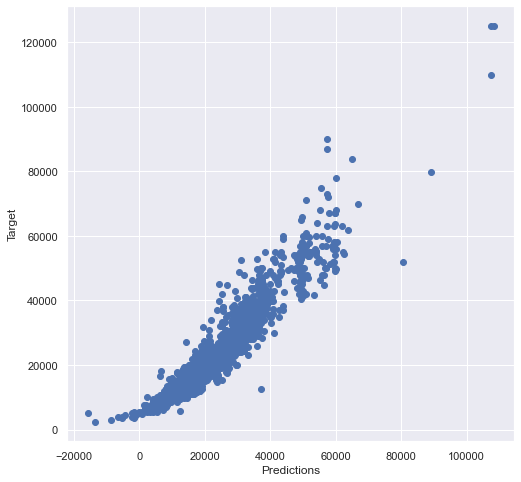

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [21]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 3685.716


,Coefficients
price,3997.546
mileage,-1890.194
tax,-1878.701
mpg,-3483.166
engineSize,2837.464
model_ A1,-1192.530
model_ A2,0.000
model_ A3,-854.225
model_ A4,-692.760
model_ A5,-185.043


In [35]:
alphas = np.linspace(1, 10, 15)
alphas

array([ 1.   ,  1.643,  2.286,  2.929,  3.571,  4.214,  4.857,  5.5  ,
        6.143,  6.786,  7.429,  8.071,  8.714,  9.357, 10.   ])

In [36]:
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 3305.37


ValueError: Shape of passed values is (55, 1), indices imply (37, 1)

NameError: name 'bike_data' is not defined

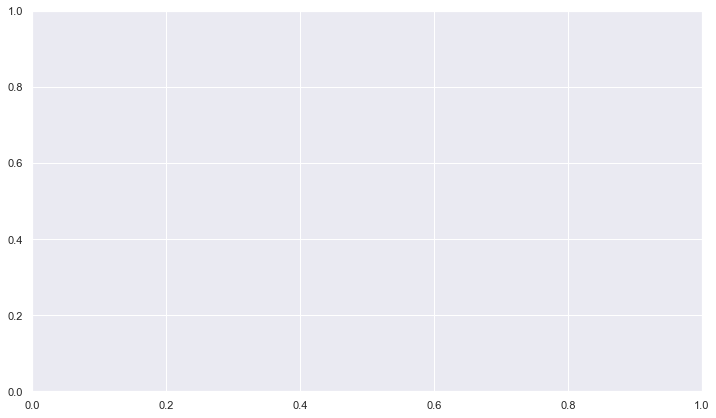

In [24]:
plt.subplots(figsize=(12,7))
sns.boxplot(x=bike_data['season'], y=bike_data['cnt'])

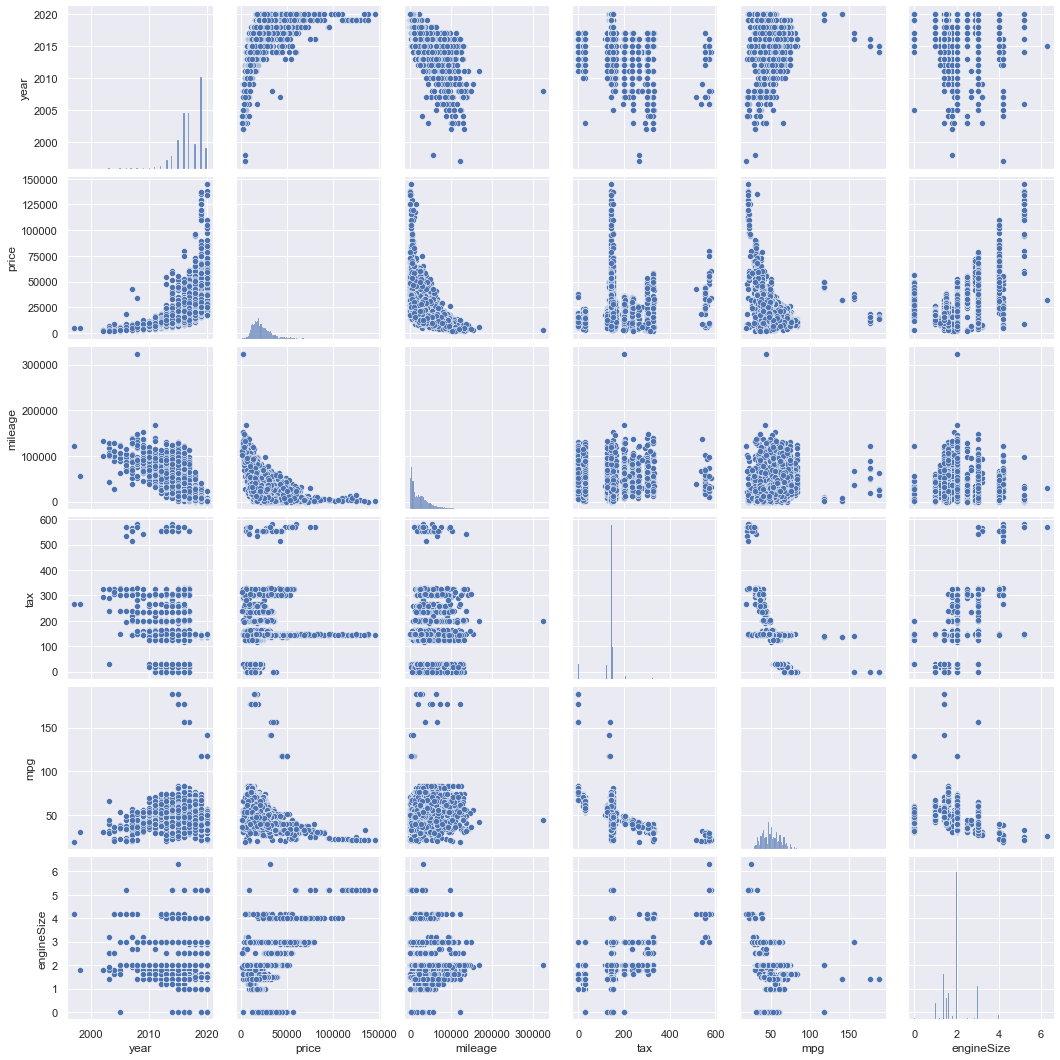

In [25]:
sns.pairplot(auto_data)

In [26]:
data_dummy

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,2020,16999,1978,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,2020,17199,609,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,2017,19499,8646,150,47.9,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
auto_data_dummy = pd.concat([data_dummy.drop('engineSize', axis=1), 
                             pd.get_dummies(data_dummy['engineSize'])], axis = 1)

In [38]:
X, Y = auto_data_dummy .drop(['price'], axis=1), auto_data_dummy ['price']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)



std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled


model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 3305.377


,Coefficients
price,3946.734
mileage,-1938.492
tax,-1735.756
mpg,-3422.823
model_ A1,-1156.955
model_ A2,0.000
model_ A3,-713.405
model_ A4,-514.207
model_ A5,-13.598
model_ A6,36.861


Text(0, 0.5, 'Target')

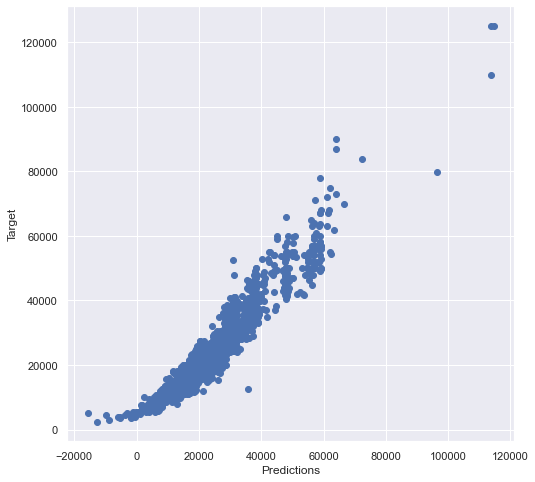

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [46]:
alphas = np.linspace(4,8,12)
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

RMSE = 3305.112


,Coefficients
price,3947.455
mileage,-1932.956
tax,-1714.627
mpg,-3411.957
model_ A1,-1112.199
model_ A2,0.000
model_ A3,-662.845
model_ A4,-469.189
model_ A5,15.140
model_ A6,63.851


In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 10, n_estimators = 100)

In [49]:
model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
model_predictions = model.predict(X_test)

model_rmse = metrics.mean_squared_error(Y_test, model_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(model_rmse, 3)}')

RMSE = 2260.455


Text(0, 0.5, 'Target')

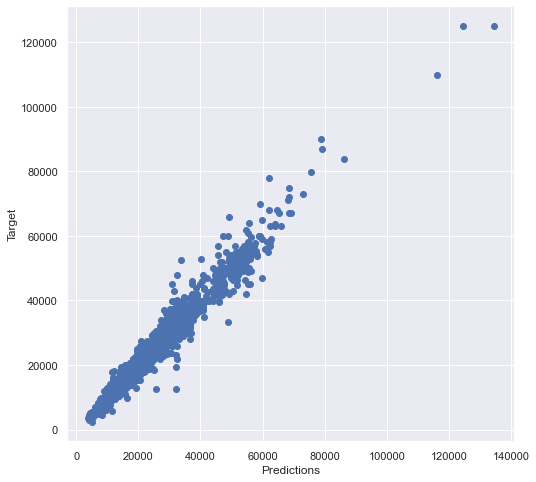

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(model_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [53]:
auto_data_dummy = pd.concat([data_dummy.drop(['engineSize', 'year'], axis=1), 
                             pd.get_dummies(data_dummy['engineSize', 'year'])], axis = 1)

X, Y = auto_data_dummy .drop(['price'], axis=1), auto_data_dummy ['price']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)



std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled


model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data_dummy.columns[1:], columns=['Coefficients'])

KeyError: ('engineSize', 'year')